In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from datetime import datetime

# File Setup
#path_to_files = r'C:\Users\Kelly\Documents\DataScienceGradCert\DATA601\Project\AQ_Project_Data'

#CO
CO = pd.read_csv('CO_ALL.csv')
# NO2
NO2 = pd.read_csv('NO2_ALL.csv')
# ozone
ozone = pd.read_csv('ozone_ALL.csv')
# pm2_5
pm2_5 = pd.read_csv('pm2_5_ALL.csv')
# pm10
pm10 = pd.read_csv('pm10_ALL.csv')
# SO2
SO2 = pd.read_csv('SO2_ALL.csv')

In [3]:
# Define functions

# Calculates monthly values by averaging daily values from csv
def AverageDailyValues(csv, values, rename):
    
    # Change Daily data to Monthly.
    csv['Year'] = pd.DatetimeIndex(csv['Date']).year
    csv['Month'] = pd.DatetimeIndex(csv['Date']).month
    csv['DATE'] = pd.to_datetime(csv[['Year', 'Month']].assign(DAY=1))
    
    # Create pivot table with daily averages.
    monthly_df = pd.pivot_table(csv, #data
                                values = values, #the values we want to average
                                index = 'DATE', #rows
                                aggfunc = np.mean) #how we want data aggregated 
    # Rename column
    monthly_df = monthly_df.rename(columns={values:rename})
    
    return monthly_df

# Create OLS Model function
# Model Reference: https://datatofish.com/statsmodels-linear-regression/
def CreateOLSModel(df,Y_field, X_field):
    import statsmodels.api as sm
    
    # Create X and Y
    Y = df[Y_field]
    X = df[X_field]
    
    # Create constant
    X = sm.add_constant(X)
    
    # Create OLS Model
    model = sm.OLS(Y,X).fit()
    
    # Returns 3 outputs
    return model,X,Y

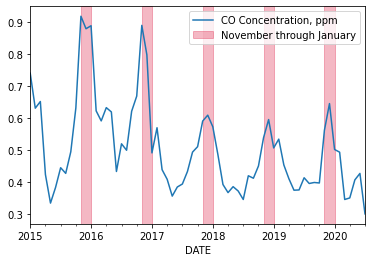

In [4]:
# Setup AQ data
# Determine average daily values, rename fields, plot and describe results. 
CO_values = 'Daily Max 8-hour CO Concentration'
CO_rename = 'Daily Max 8-hour CO Concentration ppm'
CO_monthly_df = AverageDailyValues(CO, CO_values, CO_rename)

#create figure and save
CO_data_fig, CO_data_ax = plt.subplots()

CO_monthly_df.plot(ax=CO_data_ax)

CO_data_ax.axvspan('11/1/2015','1/1/2016', color="crimson", alpha=.3)
CO_data_ax.axvspan('11/1/2016','1/1/2017', color="crimson", alpha=.3)
CO_data_ax.axvspan('11/1/2017','1/1/2018', color="crimson", alpha=.3)
CO_data_ax.axvspan('11/1/2018','1/1/2019', color="crimson", alpha=.3)
CO_data_ax.axvspan('11/1/2019','1/1/2020', color="crimson", alpha=.3)

CO_data_ax.legend(['CO Concentration, ppm', 'November through January'])

CO_monthly_df.describe()
CO_data_ax.figure.savefig('CO_data.png')

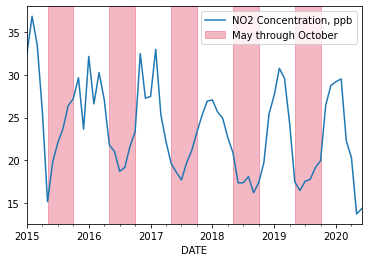

In [5]:
# Determine average daily values, rename fields, plot and describe results
NO2_values = 'Daily Max 1-hour NO2 Concentration'
NO2_rename = 'Daily Max 1-hour NO2 Concentration ppb'
NO2_monthly_df = AverageDailyValues(NO2, NO2_values, NO2_rename)

#create figure and save
NO2_data_fig, NO2_data_ax = plt.subplots()

NO2_monthly_df.plot(ax=NO2_data_ax)

NO2_data_ax.axvspan('5/1/2015','10/1/2015', color="crimson", alpha=.3)
NO2_data_ax.axvspan('5/1/2016','10/1/2016', color="crimson", alpha=.3)
NO2_data_ax.axvspan('5/1/2017','10/1/2017', color="crimson", alpha=.3)
NO2_data_ax.axvspan('5/1/2018','10/1/2018', color="crimson", alpha=.3)
NO2_data_ax.axvspan('5/1/2019','10/1/2019', color="crimson", alpha=.3)

NO2_data_ax.legend(['NO2 Concentration, ppb', 'May through October'])

NO2_monthly_df.describe()
NO2_data_ax.figure.savefig('NO2_data.png')

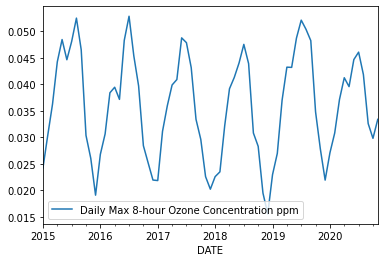

In [6]:
# Determine average daily values, rename fields, plot and describe results
ozone_values = 'Daily Max 8-hour Ozone Concentration'
ozone_rename = 'Daily Max 8-hour Ozone Concentration ppm'

ozone_monthly_df = AverageDailyValues(ozone, ozone_values, ozone_rename)
ozone_data_plt = ozone_monthly_df.plot()
ozone_data_plt
ozone_monthly_df.describe()
ozone_data_plt.figure.savefig('ozone_data.png')

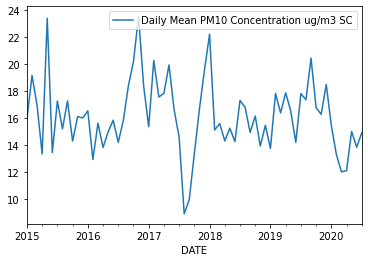

In [7]:
# Determine average daily values, rename fields, plot and describe results
pm10_values = 'Daily Mean PM10 Concentration'
pm10_rename = 'Daily Mean PM10 Concentration ug/m3 SC'

pm10_monthly_df = AverageDailyValues(pm10, pm10_values, pm10_rename)
pm10_data_plt = pm10_monthly_df.plot()
pm10_data_plt
pm10_monthly_df.describe()
pm10_data_plt.figure.savefig('pm10_data.png')

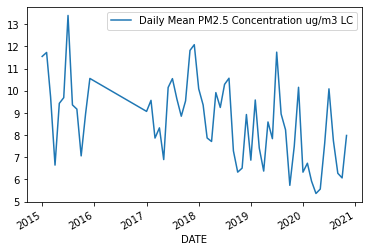

In [8]:
# Determine average daily values, rename fields, plot and describe results
pm2_5_values = 'Daily Mean PM2.5 Concentration'
pm2_5_rename = 'Daily Mean PM2.5 Concentration ug/m3 LC'

pm2_5_monthly_df = AverageDailyValues(pm2_5, pm2_5_values, pm2_5_rename)
pm2_5_data_plt = pm2_5_monthly_df.plot()
pm2_5_data_plt
pm2_5_monthly_df.describe()
pm2_5_data_plt.figure.savefig('pm2_5_data.png')

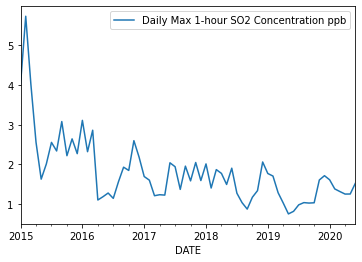

In [9]:
# Determine average daily values, rename fields, plot and describe results
SO2_values = 'Daily Max 1-hour SO2 Concentration'
SO2_rename = 'Daily Max 1-hour SO2 Concentration ppb'

SO2_monthly_df = AverageDailyValues(SO2, SO2_values, SO2_rename)
SO2_data_plt = SO2_monthly_df.plot()
SO2_data_plt
SO2_monthly_df.describe()
SO2_data_plt.figure.savefig('SO2_data.png')

In [10]:
# Setup Gasoline Data

# Read Gasline Data
gasoline_sales_df = pd.read_csv('District_of_Columbia_Total_Gasoline_All_Sales_per_Deliveries_by_Prime_Supplier.csv', skiprows=4)
gasoline_sales_df.head()

,Month,District of Columbia Total Gasoline All Sales/Deliveries by Prime Supplier Thousand Gallons per Day
0,Aug 2020,172.1
1,Jul 2020,166.3
2,Jun 2020,150.8
3,May 2020,117.9
4,Apr 2020,94.1


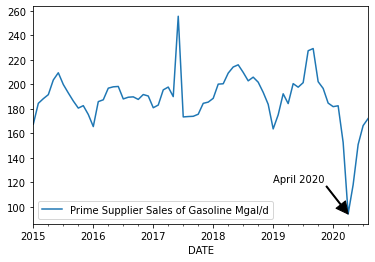

In [11]:
# Rename field to shorter name
gasoline_values = 'District of Columbia Total Gasoline All Sales/Deliveries by Prime Supplier Thousand Gallons per Day'
gasoline_rename = 'Prime Supplier Sales of Gasoline Mgal/d'
gasoline_sales_df = gasoline_sales_df.rename(columns={gasoline_values:gasoline_rename})

# Change format of months in Month column to match our other data
gasoline_sales_df['DATE'] = pd.to_datetime(gasoline_sales_df['Month'], infer_datetime_format=True)

#gasoline_sales_df.head()
gasoline_data_plt = gasoline_sales_df.loc[gasoline_sales_df['DATE']>='01/01/2015']
gasoline_data_fig, gasoline_data_ax = plt.subplots()

gasoline_data_plt.plot(x='DATE', y=gasoline_rename, ax=gasoline_data_ax)

gasoline_data_ax.annotate('April 2020', xy=('4/1/2020', 94), xytext=('1/1/2019', 120), 
                          arrowprops=dict(facecolor='black', width=1))

gasoline_data_ax.figure.savefig('gasoline_data.png')

In [12]:
# Merge dataframes together
pollution_df = gasoline_sales_df[['DATE', 'Prime Supplier Sales of Gasoline Mgal/d']].merge(CO_monthly_df, on='DATE')
pollution_df = pollution_df.merge(pm10_monthly_df, on='DATE')
pollution_df = pollution_df.merge(NO2_monthly_df, on='DATE')

# Add seasonal dummy variables
# since we observed seasonality in NO2 and CO data, we will add these dummies to try to capture 
# the differing behavior in different months
pollution_df= pollution_df.set_index('DATE')
month_dummies = pd.get_dummies(pollution_df.index.month).rename(columns={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 
                                                                          6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 
                                                                          11:'Nov', 12:'Dec'})
month_dummies.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0


In [13]:
# Prep data for analysis
pollution_df = pollution_df.reset_index()
pollution_df = pd.concat([pollution_df, month_dummies], axis=1)
#pollution_df.head()

In [14]:
# Create testing and training sets from pollution dataframe based on year
pollution_train_df = pollution_df.loc[pollution_df['DATE'] < '01/01/2020']
pollution_test_df = pollution_df.loc[pollution_df['DATE'] >= '01/01/2020']

,DATE,Prime Supplier Sales of Gasoline Mgal/d,Daily Max 8-hour CO Concentration ppm,Daily Mean PM10 Concentration ug/m3 SC,Daily Max 1-hour NO2 Concentration ppb,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2020-06-01,150.8,0.426667,13.866667,14.376724,0,0,0,0,0,1,0,0,0,0,0,0
1,2020-05-01,117.9,0.406452,15.038462,13.749587,0,0,0,0,1,0,0,0,0,0,0,0
2,2020-04-01,94.1,0.350000,12.133333,20.318803,0,0,0,1,0,0,0,0,0,0,0,0
3,2020-03-01,152.6,0.345161,12.032258,22.285484,0,0,1,0,0,0,0,0,0,0,0,0
4,2020-02-01,182.5,0.493103,13.321429,29.524138,0,1,0,0,0,0,0,0,0,0,0,0
5,2020-01-01,181.8,0.501613,15.481481,29.202521,1,0,0,0,0,0,0,0,0,0,0,0


In [14]:
model_CO = CreateOLSModel(pollution_train_df,CO_rename,gasoline_rename)
print(model_CO[0].summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.269
Model:                                               OLS   Adj. R-squared:                  0.256
Method:                                    Least Squares   F-statistic:                     21.34
Date:                                   Fri, 04 Dec 2020   Prob (F-statistic):           2.18e-05
Time:                                           16:07:20   Log-Likelihood:                 39.915
No. Observations:                                     60   AIC:                            -75.83
Df Residuals:                                         58   BIC:                            -71.64
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

In [15]:
model_pm10 = CreateOLSModel(pollution_train_df,pm10_rename,gasoline_rename)
print(model_pm10[0].summary())

                                      OLS Regression Results                                      
Dep. Variable:     Daily Mean PM10 Concentration ug/m3 SC   R-squared:                       0.027
Model:                                                OLS   Adj. R-squared:                  0.010
Method:                                     Least Squares   F-statistic:                     1.592
Date:                                    Fri, 04 Dec 2020   Prob (F-statistic):              0.212
Time:                                            16:07:31   Log-Likelihood:                -143.51
No. Observations:                                      60   AIC:                             291.0
Df Residuals:                                          58   BIC:                             295.2
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          

In [17]:
model_NO2 = CreateOLSModel(pollution_train_df,NO2_rename,gasoline_rename)
print(model_NO2[0].summary())

                                      OLS Regression Results                                      
Dep. Variable:     Daily Max 1-hour NO2 Concentration ppb   R-squared:                       0.278
Model:                                                OLS   Adj. R-squared:                  0.266
Method:                                     Least Squares   F-statistic:                     22.36
Date:                                    Sun, 06 Dec 2020   Prob (F-statistic):           1.49e-05
Time:                                            13:29:48   Log-Likelihood:                -173.47
No. Observations:                                      60   AIC:                             350.9
Df Residuals:                                          58   BIC:                             355.1
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          

In [18]:
# Seasonal Test 1

In [19]:
# Apply seasonal variation to OLS model with gasoline and months.
values = [gasoline_rename, 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']

In [20]:
# Apply seasonal variation to OLS model
model_CO_seasonal = CreateOLSModel(pollution_train_df,CO_rename,values)
print(model_CO_seasonal[0].summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.577
Model:                                               OLS   Adj. R-squared:                  0.469
Method:                                    Least Squares   F-statistic:                     5.335
Date:                                   Sun, 06 Dec 2020   Prob (F-statistic):           1.36e-05
Time:                                           13:29:50   Log-Likelihood:                 56.303
No. Observations:                                     60   AIC:                            -86.61
Df Residuals:                                         47   BIC:                            -59.38
Df Model:                                             12                                         
Covariance Type:                               nonrobust                                         
                    

In [21]:
# Apply seasonal variation to OLS model
model_NO2_seasonal = CreateOLSModel(pollution_train_df,NO2_rename,values)
print(model_NO2_seasonal[0].summary())

                                      OLS Regression Results                                      
Dep. Variable:     Daily Max 1-hour NO2 Concentration ppb   R-squared:                       0.726
Model:                                                OLS   Adj. R-squared:                  0.656
Method:                                     Least Squares   F-statistic:                     10.36
Date:                                    Sun, 06 Dec 2020   Prob (F-statistic):           1.49e-09
Time:                                            13:29:51   Log-Likelihood:                -144.45
No. Observations:                                      60   AIC:                             314.9
Df Residuals:                                          47   BIC:                             342.1
Df Model:                                              12                                         
Covariance Type:                                nonrobust                                         
          

In [22]:
# Seasonal Test 2

In [23]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
model2_CO_seasonal = CreateOLSModel(pollution_train_df, CO_rename, values)
print(model2_CO_seasonal[0].summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.574
Model:                                               OLS   Adj. R-squared:                  0.476
Method:                                    Least Squares   F-statistic:                     5.873
Date:                                   Sun, 06 Dec 2020   Prob (F-statistic):           6.15e-06
Time:                                           13:29:51   Log-Likelihood:                 56.094
No. Observations:                                     60   AIC:                            -88.19
Df Residuals:                                         48   BIC:                            -63.06
Df Model:                                             11                                         
Covariance Type:                               nonrobust                                         
                    

In [24]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename,'Feb', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']                                  
model2_NO2_seasonal = CreateOLSModel(pollution_train_df,NO2_rename, values )
print(model2_NO2_seasonal[0].summary())

                                      OLS Regression Results                                      
Dep. Variable:     Daily Max 1-hour NO2 Concentration ppb   R-squared:                       0.725
Model:                                                OLS   Adj. R-squared:                  0.662
Method:                                     Least Squares   F-statistic:                     11.49
Date:                                    Sun, 06 Dec 2020   Prob (F-statistic):           4.53e-10
Time:                                            13:29:52   Log-Likelihood:                -144.55
No. Observations:                                      60   AIC:                             313.1
Df Residuals:                                          48   BIC:                             338.2
Df Model:                                              11                                         
Covariance Type:                                nonrobust                                         
          

In [25]:
# Seasonal Test 3

In [26]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Nov', 'Dec']
model3_CO_seasonal = CreateOLSModel(pollution_train_df, CO_rename, values)
print(model3_CO_seasonal[0].summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.568
Model:                                               OLS   Adj. R-squared:                  0.480
Method:                                    Least Squares   F-statistic:                     6.453
Date:                                   Sun, 06 Dec 2020   Prob (F-statistic):           2.99e-06
Time:                                           13:29:52   Log-Likelihood:                 55.721
No. Observations:                                     60   AIC:                            -89.44
Df Residuals:                                         49   BIC:                            -66.40
Df Model:                                             10                                         
Covariance Type:                               nonrobust                                         
                    

In [27]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']                                  
model3_NO2_seasonal = CreateOLSModel(pollution_train_df,NO2_rename, values )
print(model3_NO2_seasonal[0].summary())

                                      OLS Regression Results                                      
Dep. Variable:     Daily Max 1-hour NO2 Concentration ppb   R-squared:                       0.719
Model:                                                OLS   Adj. R-squared:                  0.661
Method:                                     Least Squares   F-statistic:                     12.51
Date:                                    Sun, 06 Dec 2020   Prob (F-statistic):           2.04e-10
Time:                                            13:29:53   Log-Likelihood:                -145.23
No. Observations:                                      60   AIC:                             312.5
Df Residuals:                                          49   BIC:                             335.5
Df Model:                                              10                                         
Covariance Type:                                nonrobust                                         
          

In [28]:
# Seasonal Test 4

In [29]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Nov', 'Dec']
model4_CO_seasonal = CreateOLSModel(pollution_train_df, CO_rename, values)
print(model4_CO_seasonal[0].summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.562
Model:                                               OLS   Adj. R-squared:                  0.483
Method:                                    Least Squares   F-statistic:                     7.134
Date:                                   Sun, 06 Dec 2020   Prob (F-statistic):           1.45e-06
Time:                                           13:29:54   Log-Likelihood:                 55.294
No. Observations:                                     60   AIC:                            -90.59
Df Residuals:                                         50   BIC:                            -69.64
Df Model:                                              9                                         
Covariance Type:                               nonrobust                                         
                    

In [30]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Dec']                                  
model4_NO2_seasonal = CreateOLSModel(pollution_train_df,NO2_rename, values )
print(model4_NO2_seasonal[0].summary())

                                      OLS Regression Results                                      
Dep. Variable:     Daily Max 1-hour NO2 Concentration ppb   R-squared:                       0.705
Model:                                                OLS   Adj. R-squared:                  0.652
Method:                                     Least Squares   F-statistic:                     13.26
Date:                                    Sun, 06 Dec 2020   Prob (F-statistic):           1.61e-10
Time:                                            13:29:54   Log-Likelihood:                -146.66
No. Observations:                                      60   AIC:                             313.3
Df Residuals:                                          50   BIC:                             334.3
Df Model:                                               9                                         
Covariance Type:                                nonrobust                                         
          

In [31]:
# Seasonal Test 5

In [32]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
#sep instead of jun
values = [gasoline_rename, 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Nov', 'Dec']
model5_CO_seasonal = CreateOLSModel(pollution_train_df, CO_rename, values)
print(model5_CO_seasonal[0].summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.557
Model:                                               OLS   Adj. R-squared:                  0.487
Method:                                    Least Squares   F-statistic:                     8.010
Date:                                   Sun, 06 Dec 2020   Prob (F-statistic):           6.36e-07
Time:                                           13:29:55   Log-Likelihood:                 54.929
No. Observations:                                     60   AIC:                            -91.86
Df Residuals:                                         51   BIC:                            -73.01
Df Model:                                              8                                         
Covariance Type:                               nonrobust                                         
                    

In [33]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
#dec instead of apr
values = [gasoline_rename, 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct']                                  
model5_NO2_seasonal = CreateOLSModel(pollution_train_df,NO2_rename, values )
print(model5_NO2_seasonal[0].summary())

                                      OLS Regression Results                                      
Dep. Variable:     Daily Max 1-hour NO2 Concentration ppb   R-squared:                       0.688
Model:                                                OLS   Adj. R-squared:                  0.639
Method:                                     Least Squares   F-statistic:                     14.08
Date:                                    Sun, 06 Dec 2020   Prob (F-statistic):           1.46e-10
Time:                                            13:29:56   Log-Likelihood:                -148.28
No. Observations:                                      60   AIC:                             314.6
Df Residuals:                                          51   BIC:                             333.4
Df Model:                                               8                                         
Covariance Type:                                nonrobust                                         
          

In [34]:
# Seasonal Test 6

In [35]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'Apr', 'May', 'Jul', 'Aug', 'Nov', 'Dec']
model6_CO_seasonal = CreateOLSModel(pollution_train_df, CO_rename, values)
print(model6_CO_seasonal[0].summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.545
Model:                                               OLS   Adj. R-squared:                  0.484
Method:                                    Least Squares   F-statistic:                     8.904
Date:                                   Sun, 06 Dec 2020   Prob (F-statistic):           3.68e-07
Time:                                           13:29:57   Log-Likelihood:                 54.150
No. Observations:                                     60   AIC:                            -92.30
Df Residuals:                                         52   BIC:                            -75.54
Df Model:                                              7                                         
Covariance Type:                               nonrobust                                         
                    

In [36]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values_NO2 = [gasoline_rename, 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct'] 

# Grabs the X and Y to create predictions
model6_NO2_seasonal, X_NO2, Y_NO2 = CreateOLSModel(pollution_train_df,NO2_rename, values_NO2)
print(model6_NO2_seasonal.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Daily Max 1-hour NO2 Concentration ppb   R-squared:                       0.688
Model:                                                OLS   Adj. R-squared:                  0.639
Method:                                     Least Squares   F-statistic:                     14.08
Date:                                    Sun, 06 Dec 2020   Prob (F-statistic):           1.46e-10
Time:                                            13:29:58   Log-Likelihood:                -148.28
No. Observations:                                      60   AIC:                             314.6
Df Residuals:                                          51   BIC:                             333.4
Df Model:                                               8                                         
Covariance Type:                                nonrobust                                         
          

In [37]:
# Seasonal Test 7

In [38]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'May', 'Jul', 'Aug', 'Nov', 'Dec']
model7_CO_seasonal = CreateOLSModel(pollution_train_df, CO_rename, values)
print(model7_CO_seasonal[0].summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.534
Model:                                               OLS   Adj. R-squared:                  0.481
Method:                                    Least Squares   F-statistic:                     10.12
Date:                                   Sun, 06 Dec 2020   Prob (F-statistic):           1.95e-07
Time:                                           13:29:59   Log-Likelihood:                 53.418
No. Observations:                                     60   AIC:                            -92.84
Df Residuals:                                         53   BIC:                            -78.18
Df Model:                                              6                                         
Covariance Type:                               nonrobust                                         
                    

In [39]:
# Seasonal Test 8

In [40]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values8 = [gasoline_rename, 'May', 'Jul', 'Nov', 'Dec']
model8_CO_seasonal = CreateOLSModel(pollution_train_df, CO_rename, values8)
print(model8_CO_seasonal[0].summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.523
Model:                                               OLS   Adj. R-squared:                  0.478
Method:                                    Least Squares   F-statistic:                     11.82
Date:                                   Sun, 06 Dec 2020   Prob (F-statistic):           9.58e-08
Time:                                           13:30:00   Log-Likelihood:                 52.695
No. Observations:                                     60   AIC:                            -93.39
Df Residuals:                                         54   BIC:                            -80.82
Df Model:                                              5                                         
Covariance Type:                               nonrobust                                         
                    

In [41]:
# Seasonal Test 9

In [42]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'Jul', 'Nov', 'Dec']
model9_CO_seasonal = CreateOLSModel(pollution_train_df, CO_rename, values)
print(model9_CO_seasonal[0].summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.512
Model:                                               OLS   Adj. R-squared:                  0.476
Method:                                    Least Squares   F-statistic:                     14.42
Date:                                   Sun, 06 Dec 2020   Prob (F-statistic):           4.09e-08
Time:                                           13:30:00   Log-Likelihood:                 52.033
No. Observations:                                     60   AIC:                            -94.07
Df Residuals:                                         55   BIC:                            -83.59
Df Model:                                              4                                         
Covariance Type:                               nonrobust                                         
                    

In [43]:
# Seasonal Test 10

In [44]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'Nov', 'Dec']

# Grabs the X and Y to create predictions
model10_CO_seasonal, X_CO, Y_CO = CreateOLSModel(pollution_train_df, CO_rename, values)
print(model10_CO_seasonal.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.496
Model:                                               OLS   Adj. R-squared:                  0.469
Method:                                    Least Squares   F-statistic:                     18.40
Date:                                   Sun, 06 Dec 2020   Prob (F-statistic):           1.98e-08
Time:                                           13:30:01   Log-Likelihood:                 51.090
No. Observations:                                     60   AIC:                            -94.18
Df Residuals:                                         56   BIC:                            -85.80
Df Model:                                              3                                         
Covariance Type:                               nonrobust                                         
                    

In [45]:
# Get predictions for the models that looked the best

# Grab X from model
X_seasonal_CO10 = X_CO
# Create Prediction
predictions_CO_seasonal10 = model10_CO_seasonal.predict(X_seasonal_CO10)

# Grab X from model and model
X_seasonal_NO26 = X_NO2
# Create Prediction
predictions_NO2_seasonal6 = model6_NO2_seasonal.predict(X_seasonal_NO26)

#merge them onto the pollution data frame
pollution_train_df['Predictions_CO'] = predictions_CO_seasonal10
pollution_train_df['Predictions_NO2'] = predictions_NO2_seasonal6
#pollution_train_df

<ipython-input-45-81278265698a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollution_train_df['Predictions_CO'] = predictions_CO_seasonal10
<ipython-input-45-81278265698a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollution_train_df['Predictions_NO2'] = predictions_NO2_seasonal6


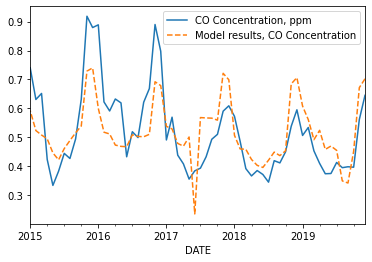

In [46]:
#plot the actual values vs predicted
CO_predict2_fig, CO_predict2_ax = plt.subplots()

pollution_train_df.plot(x='DATE', y='Daily Max 8-hour CO Concentration ppm', ax=CO_predict2_ax)
pollution_train_df.plot(x='DATE', y='Predictions_CO', linestyle='--', ax=CO_predict2_ax)
CO_predict2_ax.legend(['CO Concentration, ppm', 'Model results, CO Concentration'])
CO_predict2_ax.figure.savefig('CO_predictions_final_model_no2020.png')

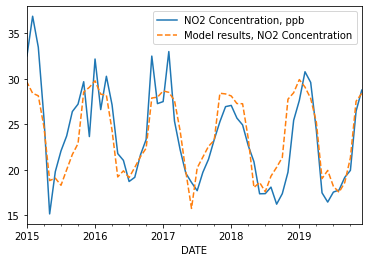

In [47]:
NO2_predict2_fig, NO2_predict2_ax = plt.subplots()

pollution_train_df.plot(x='DATE', y='Daily Max 1-hour NO2 Concentration ppb', ax=NO2_predict2_ax)
pollution_train_df.plot(x='DATE', y='Predictions_NO2', linestyle='--', ax=NO2_predict2_ax)
NO2_predict2_ax.legend(['NO2 Concentration, ppb', 'Model results, NO2 Concentration'])
NO2_predict2_ax.figure.savefig('NO2_predictions_final_model_no2020.png')

In [48]:
#now that we have final models, use them to predict 2020 data
X_CO_2020 = pollution_df[['Prime Supplier Sales of Gasoline Mgal/d', 'Nov', 'Dec']]
X_CO_2020 = sm.add_constant(X_CO_2020)
predictions_CO_2020 = model10_CO_seasonal.predict(X_CO_2020)

X_NO2_2020 = pollution_df[['Prime Supplier Sales of Gasoline Mgal/d', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']]
X_NO2_2020 = sm.add_constant(X_NO2_2020)
predictions_NO2_2020 = model6_NO2_seasonal.predict(X_NO2_2020)

#add predictions to df
pollution_df['Predictions_CO'] = predictions_CO_2020
pollution_df['Predictions_NO2'] = predictions_NO2_2020

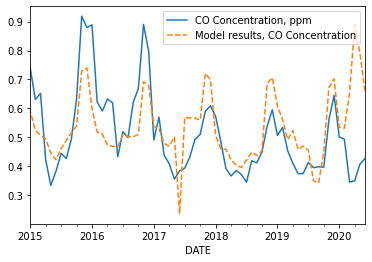

In [49]:
CO_final_fig, CO_final_ax = plt.subplots()

pollution_df.plot(x='DATE', y='Daily Max 8-hour CO Concentration ppm', ax=CO_final_ax)
pollution_df.plot(x='DATE', y='Predictions_CO', linestyle='--', ax=CO_final_ax)

CO_final_ax.legend(['CO Concentration, ppm', 'Model results, CO Concentration'])

CO_final_ax.figure.savefig('CO_predictions_final_all_data.png')

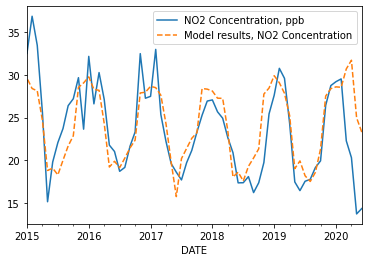

In [50]:
NO2_final_fig, NO2_final_ax = plt.subplots()

pollution_df.plot(x='DATE', y='Daily Max 1-hour NO2 Concentration ppb', ax=NO2_final_ax)
pollution_df.plot(x='DATE', y='Predictions_NO2', linestyle='--', ax=NO2_final_ax)

NO2_final_ax.legend(['NO2 Concentration, ppb', 'Model results, NO2 Concentration'])

NO2_final_ax.figure.savefig('NO2_predictions_final_all_data.png')

In [57]:
print(model10_CO_seasonal.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.496
Model:                                               OLS   Adj. R-squared:                  0.469
Method:                                    Least Squares   F-statistic:                     18.40
Date:                                   Sun, 06 Dec 2020   Prob (F-statistic):           1.98e-08
Time:                                           13:31:21   Log-Likelihood:                 51.090
No. Observations:                                     60   AIC:                            -94.18
Df Residuals:                                         56   BIC:                            -85.80
Df Model:                                              3                                         
Covariance Type:                               nonrobust                                         
                    

In [58]:
print(model6_NO2_seasonal.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Daily Max 1-hour NO2 Concentration ppb   R-squared:                       0.688
Model:                                                OLS   Adj. R-squared:                  0.639
Method:                                     Least Squares   F-statistic:                     14.08
Date:                                    Sun, 06 Dec 2020   Prob (F-statistic):           1.46e-10
Time:                                            13:33:09   Log-Likelihood:                -148.28
No. Observations:                                      60   AIC:                             314.6
Df Residuals:                                          51   BIC:                             333.4
Df Model:                                               8                                         
Covariance Type:                                nonrobust                                         
          

In [51]:
pollution_df.to_excel('data_and_predictions.xlsx', index=False)